In [1]:
# load libraries
from sklearn.metrics import accuracy_score,classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load the data and split it between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [4]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


In [6]:
model_underfitted = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(4, activation= "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_underfitted.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Hyperparameters
batch_size = 128
epochs = 30
model_underfitted.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.model_selection import train_test_split

# Separate the test data
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# model training
history_underfitted = model_underfitted.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/30
375/375 [==============================] - 4s 7ms/step - loss: 1.2878 - accuracy: 0.5633 - val_loss: 0.8196 - val_accuracy: 0.7361
Epoch 2/30
375/375 [==============================] - 3s 9ms/step - loss: 0.7202 - accuracy: 0.7764 - val_loss: 0.6383 - val_accuracy: 0.8057
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 0.6038 - accuracy: 0.8200 - val_loss: 0.5642 - val_accuracy: 0.8326
Epoch 4/30
375/375 [==============================] - 3s 9ms/step - loss: 0.5507 - accuracy: 0.8385 - val_loss: 0.5322 - val_accuracy: 0.8462
Epoch 5/30
375/375 [==============================] - 3s 7ms/step - loss: 0.5207 - accuracy: 0.8499 - val_loss: 0.5101 - val_accuracy: 0.8538
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.5013 - accuracy: 0.8551 - val_loss: 0.4989 - val_accuracy: 0.8569
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.4878 - accuracy: 0.8596 - val_loss: 0.4891 - val_accuracy: 0.8587
Epoch

In [8]:
model_overfitted = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(128, activation= "relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_overfitted.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_overfitted.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

from sklearn.model_selection import train_test_split

# model training
history_overfitted = model_overfitted.fit(X_train1,
                    y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    shuffle=True)

Epoch 1/30
375/375 [==============================] - 3s 6ms/step - loss: 0.3941 - accuracy: 0.8927 - val_loss: 0.2280 - val_accuracy: 0.9346
Epoch 2/30
375/375 [==============================] - 2s 5ms/step - loss: 0.1884 - accuracy: 0.9467 - val_loss: 0.1677 - val_accuracy: 0.9526
Epoch 3/30
375/375 [==============================] - 2s 5ms/step - loss: 0.1380 - accuracy: 0.9607 - val_loss: 0.1443 - val_accuracy: 0.9583
Epoch 4/30
375/375 [==============================] - 3s 7ms/step - loss: 0.1079 - accuracy: 0.9696 - val_loss: 0.1220 - val_accuracy: 0.9645
Epoch 5/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0864 - accuracy: 0.9757 - val_loss: 0.1082 - val_accuracy: 0.9688
Epoch 6/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0720 - accuracy: 0.9798 - val_loss: 0.1033 - val_accuracy: 0.9699
Epoch 7/30
375/375 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9833 - val_loss: 0.0939 - val_accuracy: 0.9732
Epoch 

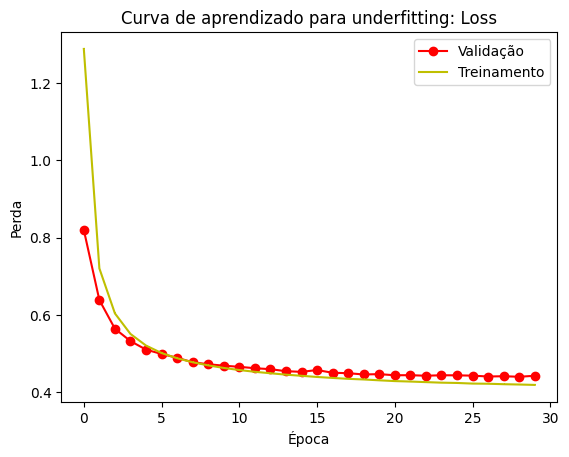

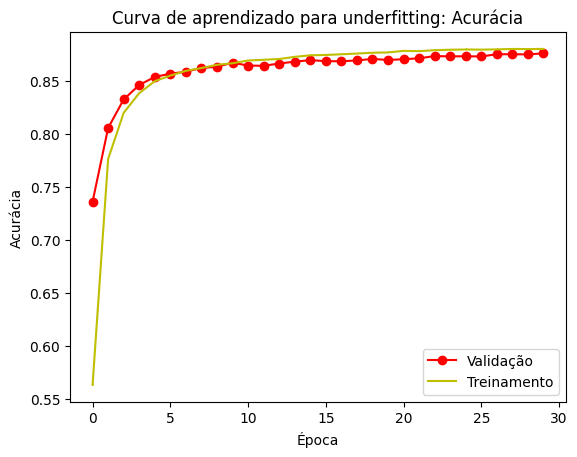

In [10]:
plt.figure()
plt.plot(history_underfitted.epoch, history_underfitted.history['val_loss'], 'o-r', label="Validação")
plt.plot(history_underfitted.epoch, history_underfitted.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado para underfitting: Loss")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend()

plt.figure()
plt.plot(history_underfitted.epoch, history_underfitted.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history_underfitted.epoch, history_underfitted.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado para underfitting: Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

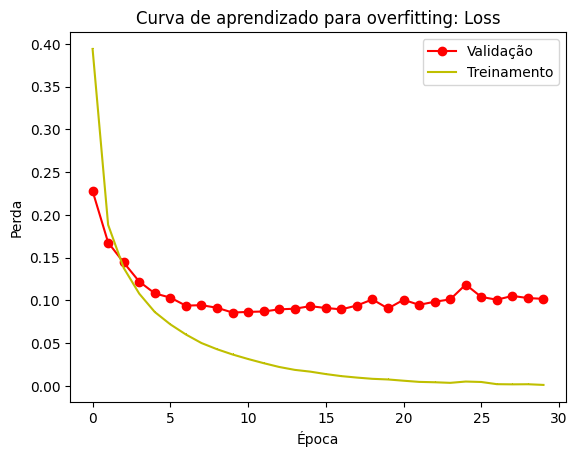

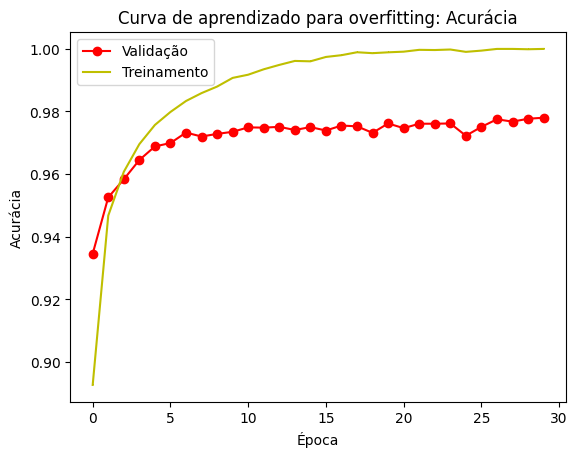

In [11]:
plt.figure()
plt.plot(history_overfitted.epoch, history_overfitted.history['val_loss'], 'o-r', label="Validação")
plt.plot(history_overfitted.epoch, history_overfitted.history['loss'],',-y', label="Treinamento")
plt.title("Curva de aprendizado para overfitting: Loss")
plt.xlabel("Época")
plt.ylabel("Perda")
plt.legend()

plt.figure()
plt.plot(history_overfitted.epoch, history_overfitted.history['val_accuracy'], 'o-r', label="Validação")
plt.plot(history_overfitted.epoch, history_overfitted.history['accuracy'],',-y', label="Treinamento")
plt.title("Curva de aprendizado para overfitting: Acurácia")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend()

In [12]:
from sklearn.metrics import confusion_matrix

y_pred_under = model_underfitted.predict(X_test)
y_pred_under = np.argmax (y_pred_under, axis = 1)
y_pred_over = model_overfitted.predict(X_test)
y_pred_over = np.argmax (y_pred_over, axis = 1)
y_test=np.argmax(y_test, axis=1)
#Create confusion matrix and normalizes it over predicted (columns)
result_under = confusion_matrix(y_test, y_pred_under , normalize='pred')
result_over = confusion_matrix(y_test, y_pred_over , normalize='pred')

313/313 [==============================] - 1s 2ms/step


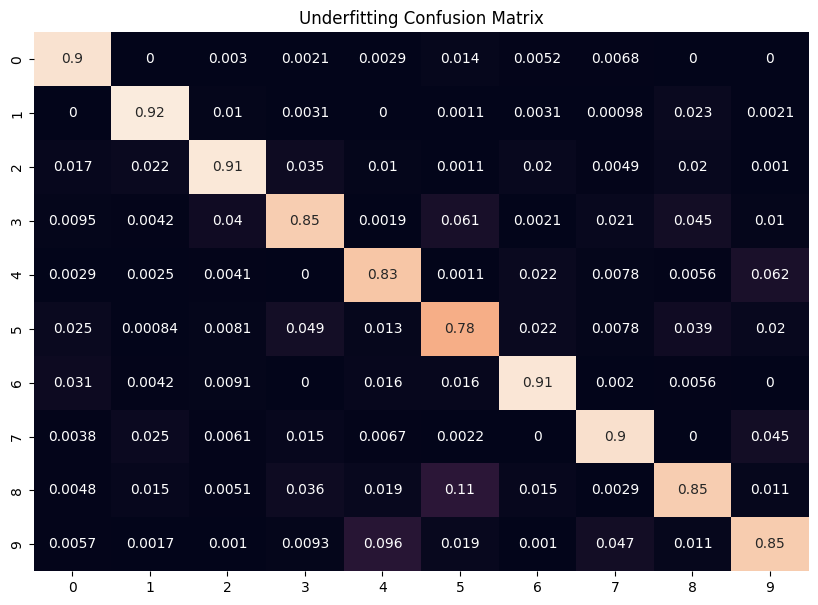

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

df_result_under = pd.DataFrame(result_under, index = classes, columns = classes)
plt.figure(figsize = (10,7))
axes = plt.axes()
result_under_plot = sn.heatmap(df_result_under, annot=True, cbar = False, ax=axes)
plt.title("Underfitting Confusion Matrix")
result_under_plot.figure.savefig("result_under.png")

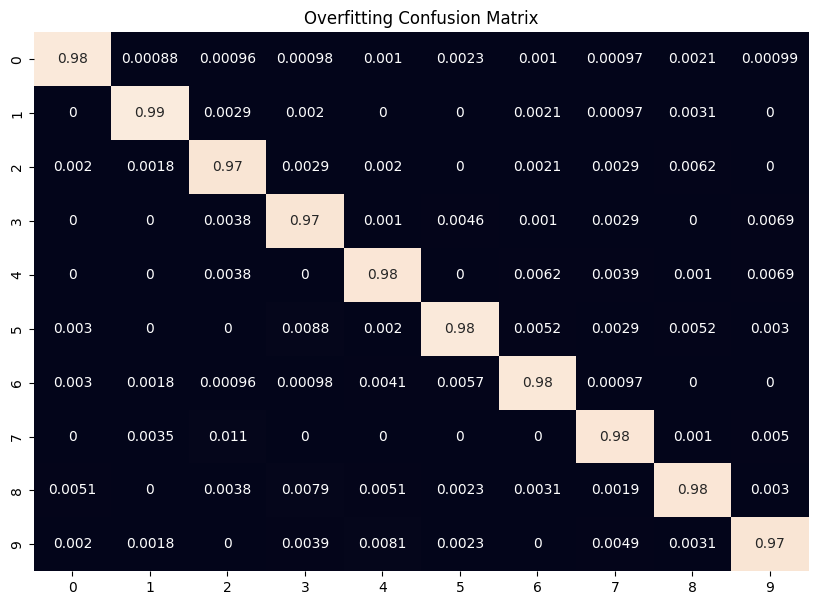

In [18]:
df_result_over = pd.DataFrame(result_over, index = classes, columns = classes)
plt.figure(figsize = (10,7))
axes = plt.axes()
result_over_plot = sn.heatmap(df_result_over, annot=True, cbar = False, ax=axes)
plt.title("Overfitting Confusion Matrix")
result_over_plot.figure.savefig("result_over.png")